# Create a data vis of the test scores before vs. after COVID

Student test scores before/after COVID [from this NYTimes article](https://www.nytimes.com/interactive/2024/01/31/us/pandemic-learning-loss-recovery.html); data is available through [this website](https://edopportunity.org/recovery/).

Methods (e.g., gcs vs cs) are described [here](https://edopportunity.org/methods/): "On the website, we report all data in grade levels, or what we call the Grade (within Cohort) Standardized (GCS) scale"

I downloaded the `seda_admindist_long_gcs_5.0` file and the codebook `seda_codebook_admindist_5.0.xlsx`.  My plan will be to compare IL schools to some other state and/or Evanston schools to other IL schools.  It's very long, so I will first start with only IL data:

```
cat seda_admindist_long_gcs_5.0_updated_20240319.csv | awk -F, '{if (NR == 1 || $2 == "IL") print $0}' > seda_admindist_long_gcs_5.0_updated_20240319_IL.csv
```

I then realized that this data set only goes up to 2019.  So I downloaded the 2023 version: `seda2023_admindist_poolsub_gys_updated_20240205.csv` and codebook `seda2023_admindist_poolsub_gys_updated_20240205.csv  seda_admindist_long_gcs_5.0_updated_20240319_IN.csv
seda2023_codebook_admindist.xlsx`, which appears to use a different metric ("gys" and "EB" vs "OLS" vs. "gcs").  Looking back at the methods website "For those using our downloadable test score files, the estimates in the explorer at the Empirical Bayes (EB) estimates."

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in pre-COVID data and explore

In [2]:
df_IL = pd.read_csv('seda_admindist_long_gcs_5.0_updated_20240319_IL.csv')
df_IL.columns

Index(['fips', 'stateabb', 'sedaadmin', 'sedaadminname', 'subject', 'grade',
       'year', 'gcs_mn_all', 'gcs_mn_se_all', 'tot_asmt_all', 'gcs_mn_asn',
       'gcs_mn_se_asn', 'tot_asmt_asn', 'gcs_mn_blk', 'gcs_mn_se_blk',
       'tot_asmt_blk', 'gcs_mn_ecd', 'gcs_mn_se_ecd', 'tot_asmt_ecd',
       'gcs_mn_fem', 'gcs_mn_se_fem', 'tot_asmt_fem', 'gcs_mn_hsp',
       'gcs_mn_se_hsp', 'tot_asmt_hsp', 'gcs_mn_mal', 'gcs_mn_se_mal',
       'tot_asmt_mal', 'gcs_mn_mfg', 'gcs_mn_se_mfg', 'tot_asmt_mfg',
       'gcs_mn_nam', 'gcs_mn_se_nam', 'tot_asmt_nam', 'gcs_mn_nec',
       'gcs_mn_se_nec', 'tot_asmt_nec', 'gcs_mn_neg', 'gcs_mn_se_neg',
       'tot_asmt_neg', 'gcs_mn_wag', 'gcs_mn_se_wag', 'tot_asmt_wag',
       'gcs_mn_wbg', 'gcs_mn_se_wbg', 'tot_asmt_wbg', 'gcs_mn_whg',
       'gcs_mn_se_whg', 'tot_asmt_whg', 'gcs_mn_wht', 'gcs_mn_se_wht',
       'tot_asmt_wht', 'gcs_mn_wng', 'gcs_mn_se_wng', 'tot_asmt_wng',
       'last_bie'],
      dtype='object')

In [3]:
cols_to_use = ['sedaadminname','year','grade', 'subject', 
#                'gcs_mn_all','gcs_mn_se_all', # mean for all participants
               'gcs_mn_wht','gcs_mn_se_wht', # white
               'gcs_mn_asn','gcs_mn_se_asn', # asian
               'gcs_mn_blk','gcs_mn_se_blk', # black
               'gcs_mn_nam','gcs_mn_se_nam', # native american
               'gcs_mn_hsp','gcs_mn_se_hsp', # hispanic
              ]
df_IL_use = df_IL[cols_to_use]
df_IL_use

,sedaadminname,year,grade,subject,gcs_mn_wht,gcs_mn_se_wht,gcs_mn_asn,gcs_mn_se_asn,gcs_mn_blk,gcs_mn_se_blk,gcs_mn_nam,gcs_mn_se_nam,gcs_mn_hsp,gcs_mn_se_hsp
0,River Ridge CUSD 210,2009,3,mth,4.200472,0.514617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,River Ridge CUSD 210,2009,3,rla,3.445275,0.571317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,River Ridge CUSD 210,2010,3,mth,3.952324,0.550985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,River Ridge CUSD 210,2010,3,rla,4.109585,0.621344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,River Ridge CUSD 210,2011,3,mth,4.464056,0.625016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87331,Midwest Central CUSD 191,2017,8,rla,7.975691,0.374505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87332,Midwest Central CUSD 191,2018,8,mth,7.044267,0.363789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87333,Midwest Central CUSD 191,2018,8,rla,6.841108,0.347156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87334,Midwest Central CUSD 191,2019,8,mth,7.922120,0.463953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_IL_use['year'].max()

2019

## Create a new version of this that will be easier to plot

In [5]:
# rename the columns to something more human-friendly
df_IL_use = df_IL_use.rename(
    columns = {
#         'gcs_mn_all': 'all_score',
#         'gcs_mn_se_all': 'all_uncertainty',
        'gcs_mn_wht': 'white_score',
        'gcs_mn_se_wht': 'white_uncertainty',
        'gcs_mn_asn': 'asian_score',
        'gcs_mn_se_asn': 'asian_uncertainty',
        'gcs_mn_blk': 'black_score',
        'gcs_mn_se_blk': 'black_uncertainty',
        'gcs_mn_nam': 'native_american_score',
        'gcs_mn_se_nam': 'native_american_uncertainty',
        'gcs_mn_hsp': 'hispanic_score',
        'gcs_mn_se_hsp': 'hispanic_uncertainty',
    }
)

# Start with District 65 (Evanston/Skokie)

In [6]:
df_IL_use_65 = df_IL_use.loc[df_IL_use['sedaadminname'].str.contains('Evanston')]
df_IL_use_65

,sedaadminname,year,grade,subject,white_score,white_uncertainty,asian_score,asian_uncertainty,black_score,black_uncertainty,native_american_score,native_american_uncertainty,hispanic_score,hispanic_uncertainty
30716,Evanston CCSD 65,2009,3,mth,6.633790,0.609693,4.922756,0.719569,1.585021,0.227738,NaN,NaN,2.062071,0.314738
30717,Evanston CCSD 65,2009,3,rla,7.120496,0.407991,5.827469,0.827764,2.034808,0.287502,NaN,NaN,1.276163,0.416316
30718,Evanston CCSD 65,2010,3,mth,7.452869,0.759584,5.313482,0.748212,1.701837,0.210589,NaN,NaN,2.193851,0.239841
30719,Evanston CCSD 65,2010,3,rla,7.766933,0.489364,4.940293,0.810793,2.129241,0.251670,NaN,NaN,1.568273,0.391499
30720,Evanston CCSD 65,2011,3,mth,6.008555,0.554513,6.875948,0.899669,1.917980,0.250242,NaN,NaN,2.676361,0.276477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30793,Evanston CCSD 65,2012,8,rla,11.583316,0.284972,10.850148,0.912228,7.251898,0.268313,NaN,NaN,8.353124,0.373381
30794,Evanston CCSD 65,2013,8,mth,12.983773,0.351386,11.801872,1.133396,7.602694,0.289590,NaN,NaN,8.287239,0.341374
30795,Evanston CCSD 65,2013,8,rla,11.895267,0.265234,10.982010,0.964666,7.529330,0.239209,NaN,NaN,7.920651,0.274085
30796,Evanston CCSD 65,2014,8,mth,12.334364,0.292404,12.171528,0.915880,7.439447,0.261630,NaN,NaN,9.195035,0.361528


In [7]:
# Melt the score columns
score_df = pd.melt(df_IL_use_65, 
   id_vars=['sedaadminname', 'year', 'grade', 'subject'], 
   value_vars=['white_score', 'asian_score', 'black_score', 'native_american_score', 'hispanic_score'],
   var_name='group', value_name='score')

# Melt the uncertainty columns
uncertainty_df = pd.melt(df_IL_use_65, 
     id_vars=['sedaadminname', 'year', 'grade', 'subject'], 
     value_vars=['white_uncertainty', 'asian_uncertainty', 'black_uncertainty', 'native_american_uncertainty', 'hispanic_uncertainty'],
     var_name='group', value_name='uncertainty')

# Remove the '_score' and '_uncertainty' suffixes from the group names
score_df['group'] = score_df['group'].str.replace('_score', '')
uncertainty_df['group'] = uncertainty_df['group'].str.replace('_uncertainty', '')

# Merge the two DataFrames on the common columns
df_IL_use_65_melt = pd.merge(score_df, uncertainty_df, on=['sedaadminname', 'year', 'grade', 'subject', 'group'])

df_IL_use_65_melt

,sedaadminname,year,grade,subject,group,score,uncertainty
0,Evanston CCSD 65,2009,3,mth,white,6.633790,0.609693
1,Evanston CCSD 65,2009,3,rla,white,7.120496,0.407991
2,Evanston CCSD 65,2010,3,mth,white,7.452869,0.759584
3,Evanston CCSD 65,2010,3,rla,white,7.766933,0.489364
4,Evanston CCSD 65,2011,3,mth,white,6.008555,0.554513
...,...,...,...,...,...,...,...
405,Evanston CCSD 65,2012,8,rla,hispanic,8.353124,0.373381
406,Evanston CCSD 65,2013,8,mth,hispanic,8.287239,0.341374
407,Evanston CCSD 65,2013,8,rla,hispanic,7.920651,0.274085
408,Evanston CCSD 65,2014,8,mth,hispanic,9.195035,0.361528


<AxesSubplot:xlabel='year', ylabel='score'>

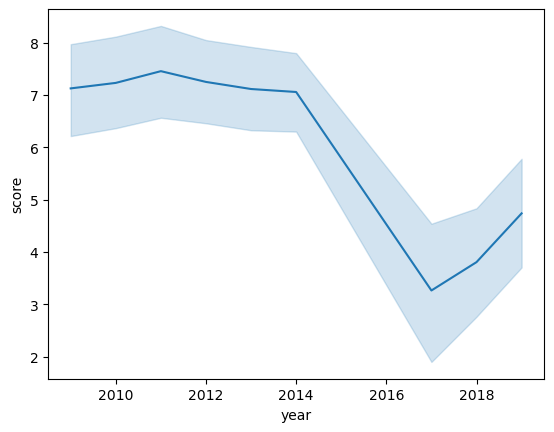

In [8]:
# aggregated over subjects, grade level, group
sns.lineplot(data = df_IL_use_65_melt, x = 'year', y = 'score')

Text(0.5, 1.0, 'Math scores in Evanston SD 65 for 4th grade')

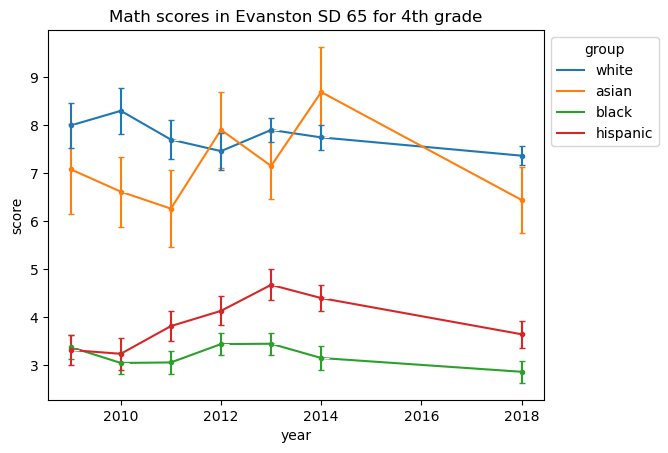

In [9]:
# select a subject and grade level
math = df_IL_use_65_melt.loc[(df_IL_use_65_melt['subject'] == 'mth') & (df_IL_use_65_melt['grade'] == 4) 
                             & (df_IL_use_65_melt['group'] != 'native_american')] # no data
ax = sns.lineplot(data = math, x = 'year', y = 'score', hue = 'group', marker = True)

# Get the current color palette used by Seaborn
palette = sns.color_palette()

# Create a dictionary to map the groups to colors
hue_order = math['group'].unique()
color_dict = {key: palette[i] for i, key in enumerate(hue_order)}

# Add shaded areas for uncertainties using fill_between
for (p, d), group in math.groupby(['group', 'grade']):
    ax.errorbar(group['year'], group['score'], yerr = group['uncertainty'], fmt='.', 
        color=color_dict[p], capsize=2, linestyle='None')
    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Math scores in Evanston SD 65 for 4th grade')

Text(0.5, 1.0, 'Reading scores in Evanston SD 65 for 4th grade')

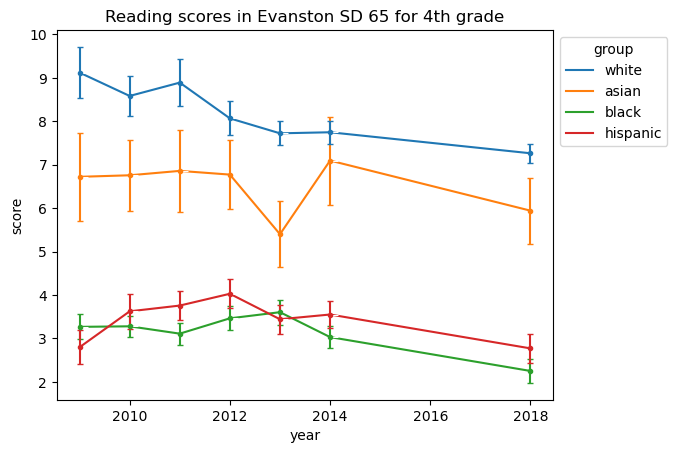

In [10]:
# select a subject and grade level
reading = df_IL_use_65_melt.loc[(df_IL_use_65_melt['subject'] == 'rla') & (df_IL_use_65_melt['grade'] == 4) 
                             & (df_IL_use_65_melt['group'] != 'native_american')] # no data
ax = sns.lineplot(data = reading, x = 'year', y = 'score', hue = 'group', marker = True)

# Get the current color palette used by Seaborn
palette = sns.color_palette()

# Create a dictionary to map the groups to colors
hue_order = reading['group'].unique()
color_dict = {key: palette[i] for i, key in enumerate(hue_order)}

# Add shaded areas for uncertainties using fill_between
for (p, d), group in reading.groupby(['group', 'grade']):
    ax.errorbar(group['year'], group['score'], yerr = group['uncertainty'], fmt='.', 
        color=color_dict[p], capsize=2, linestyle='None')
    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Reading scores in Evanston SD 65 for 4th grade')

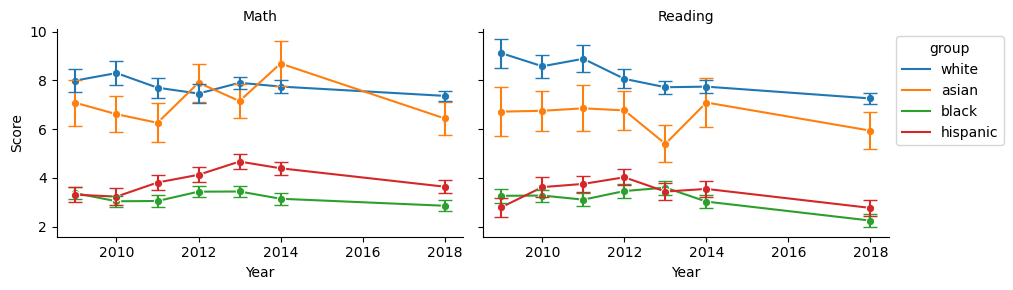

In [11]:
# side-by-side figures
df = df_IL_use_65_melt.copy().loc[(df_IL_use_65_melt['grade'] == 4) 
                             & (df_IL_use_65_melt['group'] != 'native_american')] # no data

# for better labels
df['subject'] = df['subject'].str.replace('mth','Math').replace('rla','Reading')

g = sns.FacetGrid(df, col = "subject", sharex = True, sharey = "row", height = 3, aspect = 1.5)
g.map(sns.lineplot, "year", "score", "group", marker = "o", legend = True)

# Get the current color palette used by Seaborn
palette = sns.color_palette()

# Create a dictionary to map the groups to colors
hue_order = df['group'].unique()
color_dict = {key: palette[i] for i, key in enumerate(hue_order)}

# Add error bars using ax.errorbar with matching colors
for ax, (_, sub_df) in zip(g.axes.flat, df.groupby('subject')):
    for _, sub_sub_df in sub_df.groupby('group'):
        color = color_dict[sub_sub_df['group'].iloc[0]]
        ax.errorbar(sub_sub_df['year'], sub_sub_df['score'], yerr=sub_sub_df['uncertainty'], fmt='none', color=color, capsize=5)

    
g.axes[0][1].legend(title="group", bbox_to_anchor=(1.3, 1), loc='upper right')

# Set labels and titles
g.set_axis_labels("Year", "Score")
g.set_titles(col_template="{col_name}")


In [12]:
g.axes[0][1]

<AxesSubplot:title={'center':'Reading'}, xlabel='Year'>

## Similar exploration of the post-COVID data

In [13]:
df_IL_2 = pd.read_csv('seda2023_admindist_poolsub_gys_updated_20240205_IL.csv')
df_IL_2.columns

Index(['fips', 'stateabb', 'sedaadmin', 'sedaadminname', 'subject', 'subgroup',
       'gys_mn_2016_ol', 'gys_mn_2016_ol_se_unadj', 'gys_mn_2016_ol_se_adj',
       'gys_mn_2016_eb_se_adj', 'gys_mn_2016_eb', 'gys_mn_2017_ol',
       'gys_mn_2017_ol_se_unadj', 'gys_mn_2017_ol_se_adj',
       'gys_mn_2017_eb_se_adj', 'gys_mn_2017_eb', 'gys_mn_2018_ol',
       'gys_mn_2018_ol_se_unadj', 'gys_mn_2018_ol_se_adj',
       'gys_mn_2018_eb_se_adj', 'gys_mn_2018_eb', 'gys_mn_2019_ol',
       'gys_mn_2019_ol_se_unadj', 'gys_mn_2019_ol_se_adj',
       'gys_mn_2019_eb_se_adj', 'gys_mn_2019_eb', 'gys_mn_2022_ol',
       'gys_mn_2022_ol_se_unadj', 'gys_mn_2022_ol_se_adj', 'gys_mn_2022_eb',
       'gys_mn_2022_eb_se_adj', 'gys_mn_2023_ol', 'gys_mn_2023_ol_se_unadj',
       'gys_mn_2023_ol_se_adj', 'gys_mn_2023_eb', 'gys_mn_2023_eb_se_adj',
       'gys_mn_1922_ol', 'gys_mn_1922_ol_se_unadj', 'gys_mn_1922_ol_se_adj',
       'gys_mn_1922_eb', 'gys_mn_1922_eb_se_adj', 'gys_mn_1923_ol',
       'gys_mn_1923_

In [14]:
# select D65 and Chicago
df_IL_2_use = df_IL_2.loc[(df_IL_2['subgroup'] == 'all') &
    ((df_IL_2['sedaadminname'].str.contains('City of Chicago')) | 
     (df_IL_2['sedaadminname'].str.contains('Lincolnshire')) | # my old school district
    (df_IL_2['sedaadminname'].str.contains('Evanston')))]


cols_to_use = ['sedaadminname','subject', 
               'gys_mn_2016_eb','gys_mn_2016_eb_se_adj',
               'gys_mn_2017_eb','gys_mn_2017_eb_se_adj',
               'gys_mn_2018_eb','gys_mn_2018_eb_se_adj',
               'gys_mn_2019_eb','gys_mn_2019_eb_se_adj',
               'gys_mn_2022_eb','gys_mn_2022_eb_se_adj',
               'gys_mn_2023_eb','gys_mn_2023_eb_se_adj',
              ]
df_IL_2_use = df_IL_2_use[cols_to_use]

# select D65
# df_IL_2_use_65 = df_IL_2_use.loc[df_IL_2_use['sedaadminname'].str.contains('Evanston')]

# remove the "all" values, only contains "all", boo! so I will compare Chicago and Evanston
# df_IL_2_use_65 = df_IL_2_use_65.loc[df_IL_2_use_65['subgroup'] != "all"]

df_IL_2_use

,sedaadminname,subject,gys_mn_2016_eb,gys_mn_2016_eb_se_adj,gys_mn_2017_eb,gys_mn_2017_eb_se_adj,gys_mn_2018_eb,gys_mn_2018_eb_se_adj,gys_mn_2019_eb,gys_mn_2019_eb_se_adj,gys_mn_2022_eb,gys_mn_2022_eb_se_adj,gys_mn_2023_eb,gys_mn_2023_eb_se_adj
903,City of Chicago SD 299,mth,-0.859336,0.015081,-0.804137,0.011221,-0.926282,0.015666,-0.923772,0.011460,-1.693218,0.106925,-1.343030,0.107565
906,City of Chicago SD 299,rla,-0.536765,0.015659,-0.556715,0.011416,-0.996457,0.016238,-1.085785,0.010564,-1.320209,0.112512,-0.645173,0.113766
1369,Evanston CCSD 65,mth,NaN,NaN,NaN,NaN,1.975541,0.234335,1.850601,0.164827,0.932091,0.121047,0.903033,0.121053
1370,Evanston CCSD 65,rla,NaN,NaN,NaN,NaN,1.405414,0.250307,1.220523,0.173517,0.874299,0.129535,1.302739,0.128524
2130,Lincolnshire-Prairieview SD 103,mth,4.485938,0.106269,4.509963,0.099416,4.526771,0.106590,4.618164,0.103154,4.200812,0.142216,4.277425,0.142485
2132,Lincolnshire-Prairieview SD 103,rla,4.704740,0.105941,4.523617,0.094909,4.400269,0.090688,4.061173,0.094969,3.510920,0.150171,3.813325,0.148502


In [15]:
# Melt the score columns
score_df = pd.melt(df_IL_2_use, 
    id_vars=['sedaadminname','subject'], 
    value_vars=['gys_mn_2016_eb', 'gys_mn_2017_eb', 'gys_mn_2018_eb', 'gys_mn_2019_eb', 'gys_mn_2022_eb', 'gys_mn_2023_eb'],
    var_name='year', value_name='score')

# Melt the uncertainty columns
uncertainty_df = pd.melt(df_IL_2_use, 
    id_vars=['sedaadminname','subject'], 
    value_vars=['gys_mn_2016_eb_se_adj', 'gys_mn_2017_eb_se_adj', 'gys_mn_2018_eb_se_adj', 'gys_mn_2019_eb_se_adj', 'gys_mn_2022_eb_se_adj', 'gys_mn_2023_eb_se_adj'],
    var_name='year', value_name='uncertainty')

# Remove the '_score' and '_uncertainty' suffixes from the group names
score_df['year'] = score_df['year'].str.replace('gys_mn_', '').str.replace('_eb', '')
uncertainty_df['year'] = uncertainty_df['year'].str.replace('gys_mn_', '').str.replace('_eb_se_adj', '')

# Merge the two DataFrames on the common columns
df_IL_2_use_melt = pd.merge(score_df, uncertainty_df, on=['sedaadminname', 'subject', 'year'])

# make the year a numeric column
df_IL_2_use_melt['year'] = pd.to_numeric(df_IL_2_use_melt['year'])

# clean up some labels so the plot looks nicer
df_IL_2_use_melt = df_IL_2_use_melt.rename(columns = {'sedaadminname':'District'})
df_IL_2_use_melt['subject'] = df_IL_2_use_melt['subject'].str.replace('mth','Math').str.replace('rla','Reading')

df_IL_2_use_melt

,District,subject,year,score,uncertainty
0,City of Chicago SD 299,Math,2016,-0.859336,0.015081
1,City of Chicago SD 299,Reading,2016,-0.536765,0.015659
2,Evanston CCSD 65,Math,2016,NaN,NaN
3,Evanston CCSD 65,Reading,2016,NaN,NaN
4,Lincolnshire-Prairieview SD 103,Math,2016,4.485938,0.106269
5,Lincolnshire-Prairieview SD 103,Reading,2016,4.704740,0.105941
6,City of Chicago SD 299,Math,2017,-0.804137,0.011221
7,City of Chicago SD 299,Reading,2017,-0.556715,0.011416
8,Evanston CCSD 65,Math,2017,NaN,NaN
9,Evanston CCSD 65,Reading,2017,NaN,NaN


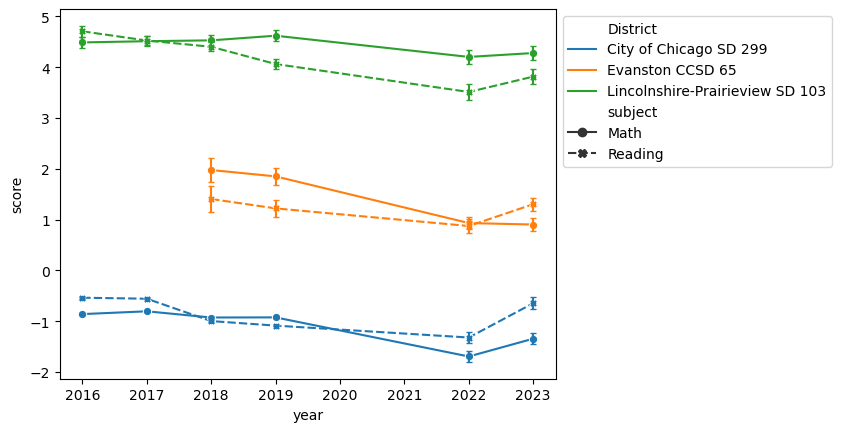

In [16]:
ax = sns.lineplot(data = df_IL_2_use_melt, x = 'year', y = 'score', hue = 'District', style = 'subject', markers = True)

# Get the current color palette used by Seaborn
palette = sns.color_palette()

# Create a dictionary to map the groups to colors
hue_order = df_IL_2_use_melt['District'].unique()
color_dict = {key: palette[i] for i, key in enumerate(hue_order)}

# Add shaded areas for uncertainties using fill_between
for (sedaadminname, subject), group in df_IL_2_use_melt.groupby(['District', 'subject']):
    ax.errorbar(group['year'], group['score'], yerr = group['uncertainty'], fmt='.', 
        color=color_dict[sedaadminname], capsize=2, linestyle='None')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


## Normalize so that I can more easily show the results on the same plot!

In [17]:
# Calculate normalization factor (score in 2019 for each group)
df_IL_2_use_melt['norm_factor'] = df_IL_2_use_melt.groupby(['District', 'subject'])['score'].transform(lambda x: x[df_IL_2_use_melt['year'] == 2019].iloc[0])

# Normalize the score add the normalization factor
df_IL_2_use_melt['normalized_score'] = df_IL_2_use_melt['score'] - df_IL_2_use_melt['norm_factor']
                     
df_IL_2_use_melt

,District,subject,year,score,uncertainty,norm_factor,normalized_score
0,City of Chicago SD 299,Math,2016,-0.859336,0.015081,-0.923772,0.064435
1,City of Chicago SD 299,Reading,2016,-0.536765,0.015659,-1.085785,0.549020
2,Evanston CCSD 65,Math,2016,NaN,NaN,1.850601,NaN
3,Evanston CCSD 65,Reading,2016,NaN,NaN,1.220523,NaN
4,Lincolnshire-Prairieview SD 103,Math,2016,4.485938,0.106269,4.618164,-0.132226
5,Lincolnshire-Prairieview SD 103,Reading,2016,4.704740,0.105941,4.061173,0.643567
6,City of Chicago SD 299,Math,2017,-0.804137,0.011221,-0.923772,0.119635
7,City of Chicago SD 299,Reading,2017,-0.556715,0.011416,-1.085785,0.529070
8,Evanston CCSD 65,Math,2017,NaN,NaN,1.850601,NaN
9,Evanston CCSD 65,Reading,2017,NaN,NaN,1.220523,NaN


In [18]:
# and modify the dataframe again for plotting
df_IL_2_use_melt = df_IL_2_use_melt.rename(columns = {'score':'raw_score'})

df_IL_2_use_melt_2 = pd.melt(df_IL_2_use_melt, 
    id_vars=['District','subject','year', 'uncertainty'], 
    value_vars=['raw_score', 'normalized_score'],
    var_name='normalization', value_name='score')

df_IL_2_use_melt_2['normalization'] = df_IL_2_use_melt_2['normalization'].str.replace('_score','')

df_IL_2_use_melt_2

,District,subject,year,uncertainty,normalization,score
0,City of Chicago SD 299,Math,2016,0.015081,raw,-0.859336
1,City of Chicago SD 299,Reading,2016,0.015659,raw,-0.536765
2,Evanston CCSD 65,Math,2016,NaN,raw,NaN
3,Evanston CCSD 65,Reading,2016,NaN,raw,NaN
4,Lincolnshire-Prairieview SD 103,Math,2016,0.106269,raw,4.485938
...,...,...,...,...,...,...
67,City of Chicago SD 299,Reading,2023,0.113766,normalized,0.440612
68,Evanston CCSD 65,Math,2023,0.121053,normalized,-0.947568
69,Evanston CCSD 65,Reading,2023,0.128524,normalized,0.082215
70,Lincolnshire-Prairieview SD 103,Math,2023,0.142485,normalized,-0.340739


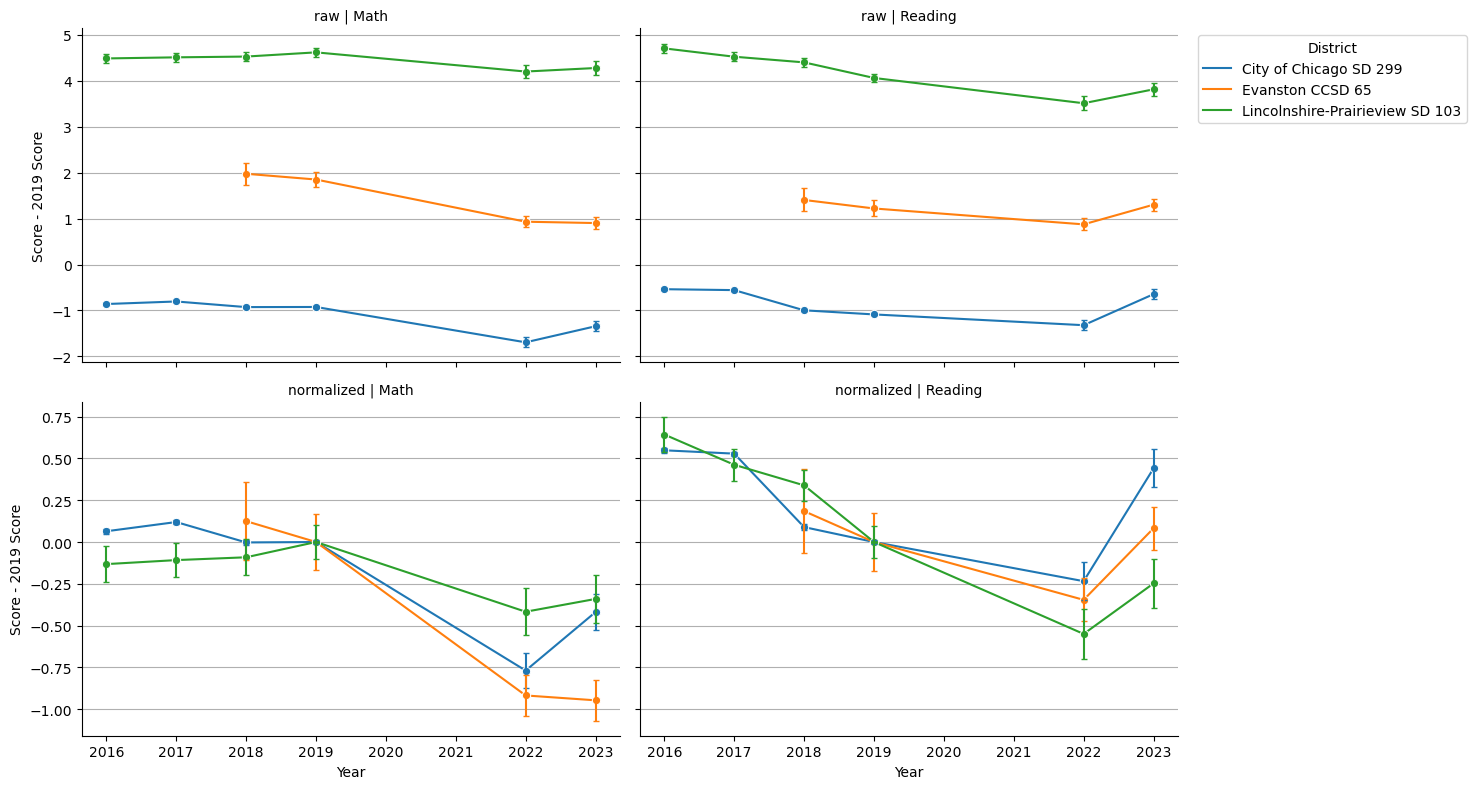

In [19]:
g = sns.FacetGrid(df_IL_2_use_melt_2, col = "subject", row = "normalization", sharex = True, sharey = "row", 
                  height = 4, aspect = 2)
g.map(sns.lineplot, "year", "score", "District", marker = "o", legend = True)


# Get the current color palette used by Seaborn
palette = sns.color_palette()

# Create a dictionary to map the groups to colors
hue_order = df_IL_2_use_melt['District'].unique()
color_dict = {key: palette[i] for i, key in enumerate(hue_order)}

# Iterate over each subplot and add error bars
for row_ax, normalization in zip(g.axes, g.row_names):
    for ax, subject in zip(row_ax, g.col_names):
        # Filter data for the current subplot
        sub_df = df_IL_2_use_melt_2[(df_IL_2_use_melt_2['subject'] == subject) & (df_IL_2_use_melt_2['normalization'] == normalization)]
        
        # Add error bars
        for _, sub_sub_df in sub_df.groupby('District'):
            color = color_dict[sub_sub_df['District'].iloc[0]]
            ax.errorbar(sub_sub_df['year'], sub_sub_df['score'], yerr=sub_sub_df['uncertainty'], fmt='none', color=color, capsize=2)



    
g.axes[0][1].legend(title="District", bbox_to_anchor=(1.55, 1), loc='upper right')

# Set labels and titles
g.set_axis_labels("Year", "Score - 2019 Score")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Adjust layout
plt.tight_layout()

# Add horizontal grid lines
for ax in g.axes.flat:
    ax.yaxis.grid(True)


## Try a bar chart of difference between 2019 and 2022 scores

In [35]:
demo = pd.read_csv('seda2023_cov_admindist_annual.csv')
# let's compare in 2019
# I *think* IL schools all have 17 at the start of their sedaadmin id
demo_2019 = demo.copy().loc[(demo['year'] == 2019) & (demo['sedaadmin'].apply(str).str.startswith('17'))]
df_IL_2 = pd.read_csv('seda2023_admindist_poolsub_gys_updated_20240205_IL.csv')
df_IL_2_use = df_IL_2.loc[(df_IL_2['subgroup'] == 'all')]
demo_2019

,sedaadmin,year,enrl38,totenrl,perfrl,perblk,perhsp,perasn,pernam,peroth,perwht
7598,1700002,2019,376.0,916.0,0.466,0.010,0.021,0.009,0.000,0.005,0.955
7603,1700003,2019,283.0,717.0,0.475,0.006,0.025,0.006,0.004,0.028,0.932
7608,1700004,2019,321.0,716.0,0.472,0.000,0.006,0.000,0.000,0.020,0.975
7613,1700005,2019,794.0,1812.0,0.397,0.010,0.034,0.007,0.002,0.061,0.885
7618,1700007,2019,257.0,631.0,0.385,0.000,0.041,0.003,0.002,0.041,0.913
...,...,...,...,...,...,...,...,...,...,...,...
10463,1743380,2019,724.0,1085.0,0.488,0.029,0.149,0.016,0.000,0.119,0.688
10468,1743800,2019,241.0,589.0,0.678,0.015,0.022,0.003,0.000,0.029,0.930
10473,1743860,2019,1616.0,2562.0,0.868,0.375,0.497,0.002,0.002,0.072,0.053
10478,1743960,2019,2943.0,6217.0,0.191,0.068,0.182,0.017,0.001,0.057,0.676


In [36]:
# find Evanston in the demo group
sedaadmin = df_IL_2_use.loc[df_IL_2_use['sedaadminname'].str.contains('Evanston')]['sedaadmin'].tolist()[0]
demo_2019_Ev = demo_2019.copy().loc[(demo_2019['sedaadmin'] == sedaadmin) & (demo_2019['year'] == 2019)]

# get the uncertainty in each value so that I can find similar schools
col = list(demo_2019_Ev.columns[4:])
Ntot = demo_2019_Ev['enrl38'].iloc[0]
demo_2019_Ev['enrl38_unc'] = Ntot**0.5
for c in col:
    N = demo_2019_Ev[c].iloc[0]*Ntot
    unc = ((1./Ntot)**2.*N + (N/Ntot**2.)**2.*Ntot)**0.5
    demo_2019_Ev[c + '_unc'] = unc
demo_2019_Ev


,sedaadmin,year,enrl38,totenrl,perfrl,perblk,perhsp,perasn,pernam,peroth,perwht,enrl38_unc,perfrl_unc,perblk_unc,perhsp_unc,perasn_unc,pernam_unc,peroth_unc,perwht_unc
8603,1714460,2019,5052.0,7768.0,0.379,0.225,0.208,0.048,0.003,0.09,0.425,71.077423,0.010171,0.007386,0.007052,0.003156,0.000772,0.004407,0.010949


In [37]:
# calculate a "distance" value from Evanston demographics
cols = [x.replace('_unc','') for x in list(demo_2019_Ev.columns) if '_unc' in x]
cols.remove('enrl38') # need to remove this since it has a different scale, but I do want to include it...
demo_2019['dist_Ev_demo'] = (((demo_2019[cols] - demo_2019_Ev.iloc[0][cols])**2.).sum(axis=1))**0.5
demo_2019['dist_Ev_N'] = abs(demo_2019['enrl38'] - demo_2019_Ev.iloc[0]['enrl38'])/demo_2019_Ev.iloc[0]['enrl38']
demo_2019['dist_Ev'] = (demo_2019['dist_Ev_demo']**2. + demo_2019['dist_Ev_N']**2.)**0.5
demo_2019.sort_values(by='dist_Ev', inplace = True)
demo_2019

,sedaadmin,year,enrl38,totenrl,perfrl,perblk,perhsp,perasn,pernam,peroth,perwht,dist_Ev_demo,dist_Ev_N,dist_Ev
8603,1714460,2019,5052.0,7768.0,0.379,0.225,0.208,0.048,0.003,0.090,0.425,0.000000,0.000000,0.000000
8238,1709420,2019,4511.0,10012.0,0.560,0.352,0.123,0.089,0.002,0.081,0.354,0.250837,0.107086,0.272739
10373,1742180,2019,5586.0,12406.0,0.269,0.063,0.173,0.081,0.001,0.047,0.635,0.294297,0.105701,0.312704
9473,1728620,2019,5910.0,13022.0,0.341,0.125,0.077,0.089,0.003,0.059,0.648,0.284563,0.169834,0.331390
10453,1743110,2019,3667.0,5350.0,0.347,0.079,0.333,0.114,0.005,0.057,0.413,0.208706,0.274149,0.344551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,1730900,2019,142.0,266.0,0.991,0.929,0.049,0.000,0.000,0.023,0.000,1.040609,0.971892,1.423883
10338,1741690,2019,12146.0,27228.0,0.172,0.089,0.120,0.322,0.002,0.043,0.424,0.382591,1.404196,1.455384
9903,1734510,2019,12364.0,28470.0,0.725,0.319,0.280,0.039,0.002,0.071,0.288,0.391086,1.447348,1.499254
8553,1713710,2019,17123.0,37800.0,0.608,0.062,0.549,0.085,0.009,0.034,0.261,0.476160,2.389351,2.436334


In [38]:
# find similar districts to Evanston based on these demographics?
# Nsig = 26 # manually adjusting this to get a reasonable number of Districts
# col = list(demo_2019_Ev.columns)
# use_df = demo_2019.copy()
# for c in col:
#     if ('_unc' in c):
#         cval = c.replace('_unc','')
#         Ev_val = demo_2019_Ev[cval].iloc[0]
#         Ev_unc = demo_2019_Ev[c].iloc[0]
#         use_df = use_df.loc[(use_df[cval] > Ev_val - Nsig*Ev_unc) & (use_df[cval] < Ev_val + Nsig*Ev_unc)]
# use_df
use_df = demo_2019.iloc[0:10]
use_df

,sedaadmin,year,enrl38,totenrl,perfrl,perblk,perhsp,perasn,pernam,peroth,perwht,dist_Ev_demo,dist_Ev_N,dist_Ev
8603,1714460,2019,5052.0,7768.0,0.379,0.225,0.208,0.048,0.003,0.090,0.425,0.000000,0.000000,0.000000
8238,1709420,2019,4511.0,10012.0,0.560,0.352,0.123,0.089,0.002,0.081,0.354,0.250837,0.107086,0.272739
10373,1742180,2019,5586.0,12406.0,0.269,0.063,0.173,0.081,0.001,0.047,0.635,0.294297,0.105701,0.312704
9473,1728620,2019,5910.0,13022.0,0.341,0.125,0.077,0.089,0.003,0.059,0.648,0.284563,0.169834,0.331390
10453,1743110,2019,3667.0,5350.0,0.347,0.079,0.333,0.114,0.005,0.057,0.413,0.208706,0.274149,0.344551
8383,1711350,2019,5017.0,7408.0,0.280,0.018,0.219,0.030,0.001,0.033,0.699,0.362524,0.006928,0.362591
8558,1713770,2019,4254.0,6627.0,0.565,0.032,0.426,0.120,0.015,0.020,0.387,0.361996,0.157957,0.394958
7988,1705790,2019,3530.0,7835.0,0.485,0.036,0.382,0.010,0.005,0.033,0.535,0.306643,0.301267,0.429874
7948,1705050,2019,3814.0,8597.0,0.195,0.014,0.183,0.154,0.002,0.038,0.610,0.356606,0.245051,0.432687
9338,1726400,2019,3272.0,7242.0,0.562,0.097,0.295,0.032,0.003,0.062,0.511,0.256667,0.352336,0.435911


In [90]:
sedaadmin = use_df['sedaadmin'].tolist()
df_IL_2_use = df_IL_2_use.copy().loc[df_IL_2_use['sedaadmin'].isin(sedaadmin)]
df_IL_2_use['sedaadminname'].unique()

array(['Barrington CUSD 220', 'Belvidere CUSD 100', 'Champaign CUSD 4',
       'Crystal Lake CCSD 47', 'CommConsolidatedSD 59',
       'Evanston CCSD 65', 'Moline-Coal Valley CUSD 40',
       'McLean County USD 5', 'CUSD 200', 'Woodland CCSD 50'],
      dtype=object)

In [91]:
cols_to_use = ['sedaadminname','subject', 
               'gys_mn_2019_eb','gys_mn_2019_eb_se_adj',
               'gys_mn_2022_eb','gys_mn_2022_eb_se_adj',
              ]
tmp = df_IL_2_use[cols_to_use].copy()
tmp['2022-2019 Score'] = tmp['gys_mn_2022_eb'] - tmp['gys_mn_2019_eb']
tmp['2022-2019 Score Uncertainty'] = (tmp['gys_mn_2022_eb_se_adj']**2. + tmp['gys_mn_2019_eb_se_adj']**2.)**0.5
df = tmp[['sedaadminname','subject','2022-2019 Score','2022-2019 Score Uncertainty']].copy()
df['subject'] = df['subject'].str.replace('mth','Math').str.replace('rla','Reading')
df.rename(columns = {'sedaadminname':'District'}, inplace = True)
df

,District,subject,2022-2019 Score,2022-2019 Score Uncertainty
443,Barrington CUSD 220,Math,-0.503460,0.133763
448,Barrington CUSD 220,Reading,0.081603,0.145795
504,Belvidere CUSD 100,Math,-0.374492,0.130619
509,Belvidere CUSD 100,Reading,-0.335059,0.143497
863,Champaign CUSD 4,Math,-0.811275,0.142495
869,Champaign CUSD 4,Reading,-0.619606,0.149221
1053,Crystal Lake CCSD 47,Math,-0.667208,0.125926
1058,Crystal Lake CCSD 47,Reading,-0.334357,0.135152
1304,CommConsolidatedSD 59,Math,0.515552,0.132759
1309,CommConsolidatedSD 59,Reading,-0.052850,0.145092


In [99]:
# sorting is a bit tricky when working with seaborn (apparently)

# this would label the bars incorrectly!
#df.sort_values(by = '2022-2019 score', inplace = True, ascending = True)

# instead...
# Separate math and reading rows
math_df = df[df['subject'] == 'Math'].copy()
reading_df = df[df['subject'] == 'Reading'].copy()

# Sort math rows by score
math_df_sorted = math_df.sort_values(by='2022-2019 Score').reset_index(drop=True)

# Reorder reading rows based on the sorted math districts
reading_df_sorted = reading_df.set_index('District').loc[math_df_sorted['District']].reset_index()

# Concatenate the sorted DataFrames
df = pd.concat([math_df_sorted, reading_df_sorted]).reset_index(drop=True)

# also add a color column
df['color'] = df.apply(lambda row: 'firebrick' if 'Evanston' in row['District'] else 'gray', axis=1)
df

,District,subject,2022-2019 Score,2022-2019 Score Uncertainty,color
0,Evanston CCSD 65,Math,-0.918510,0.204500,firebrick
1,Champaign CUSD 4,Math,-0.811275,0.142495,gray
2,Crystal Lake CCSD 47,Math,-0.667208,0.125926,gray
3,Woodland CCSD 50,Math,-0.642794,0.136920,gray
4,McLean County USD 5,Math,-0.624585,0.126752,gray
5,Barrington CUSD 220,Math,-0.503460,0.133763,gray
6,Belvidere CUSD 100,Math,-0.374492,0.130619,gray
7,Moline-Coal Valley CUSD 40,Math,-0.330638,0.137166,gray
8,CUSD 200,Math,-0.002430,0.125787,gray
9,CommConsolidatedSD 59,Math,0.515552,0.132759,gray


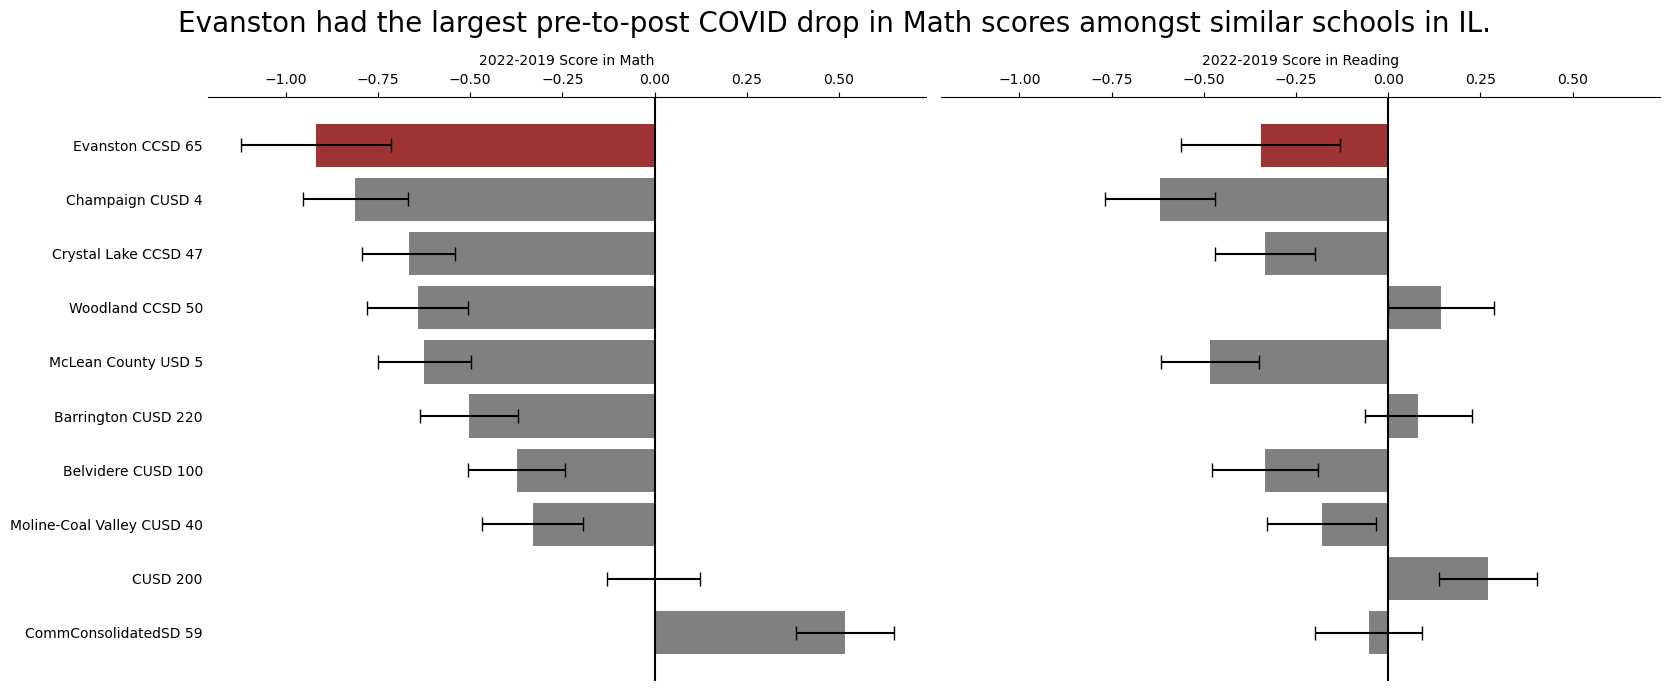

In [149]:
# Create a FacetGrid
g = sns.FacetGrid(df, col="subject", sharey=True, height=7, aspect=1.2)

# Map the barplot to the FacetGrid
def barplot_with_colors(data, **kwargs):
    sns.barplot(y="District", x="2022-2019 Score", data=data, palette=data['color'].values)

g.map_dataframe(barplot_with_colors)

# Add error bars using Matplotlib's errorbar
for ax, (_, sub_df) in zip(g.axes.flat, df.groupby('subject')):
# add a axis at zero
    ax.axvline(x=0, color='black')
    
# use the top x axis instead?
    ax.spines['top'].set_visible(True)
    ax.xaxis.tick_top() 
    ax.spines['bottom'].set_visible(False)

# try removing axes
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', length=0) 
    
    #ax.set_xlim(-1.5,1.5)
    
    for i, (index, row) in enumerate(sub_df.iterrows()):
        ax.errorbar(row['2022-2019 Score'], i, xerr=row['2022-2019 Score Uncertainty'], fmt='none', color='black', capsize=5)
#         ax.axhline(y=i, color='lightgray', zorder=-1)
# try direct labeling (doesn't work well with error bars)
#         ax.text(row['2022-2019 Score']+ 0.01, i-0.15, f"{row['2022-2019 Score']:.2f}", va='center', ha='right' if row['2022-2019 Score'] > 0 else 'left', color='black', fontsize=12)

# Set labels and titles
g.set_axis_labels("", "")
g.set_titles(col_template="2022-2019 Score in {col_name}")

g.fig.suptitle('Evanston had the largest pre-to-post COVID drop in math scores amongst similar schools in IL.', fontsize=20)

# Adjust layout
plt.tight_layout()